In [1]:
import time
print(time.time())
import pandas as pd
import numpy as np
import os
import itertools

from sklearn.model_selection import GridSearchCV

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import math
from scipy.stats import iqr
from numpy import linalg
import matplotlib.pyplot as plt
print(time.time())
from scipy import stats

#feature selection
from sklearn.ensemble import ExtraTreesClassifier

#label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

#Feature Normalisation
from sklearn.preprocessing import StandardScaler

#Feature Extraction
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD



#supervised
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve,roc_curve
from sklearn.metrics import auc
import _pickle as pickle

1521588396.1740458
1521588436.2020051


d:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def hist_activities(df):
    df['label'].value_counts().plot(kind='bar', title='Training examples by activity type')
    plt.show()

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.show()

In [4]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

In [5]:
file = open("best_model_12feat.pkl",'rb')
clf = pickle.load(file)

In [6]:
file = open("label_encoder_12feat.pkl",'rb')
le_s = pickle.load(file)
file = open("standard_scaler_12feat.pkl",'rb')
std_scale = pickle.load(file)

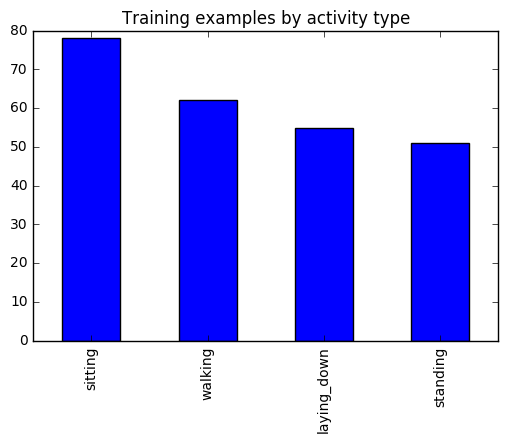

In [8]:
test_data = pd.read_csv("test_feat12.csv",index_col = 0)
hist_activities(test_data)

In [9]:
test_data = clean_dataset(test_data)
test_features = test_data.copy()
print(test_features.shape)
test_labels = test_features["label"]
test_features = test_features.drop(["label"], axis = 1)
print(test_features.shape)

(246, 13)
(246, 12)


In [10]:
print(test_labels[0:5])
test_labels = le_s.transform(test_labels)
print(test_labels[0:5])

0    sitting
1    sitting
2    sitting
3    sitting
4    sitting
Name: label, dtype: object
[1 1 1 1 1]


In [11]:
print(test_features.shape)
test_features = std_scale.transform(test_features)
print(test_features.shape)

(246, 12)
(246, 12)


d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
d:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Confusion matrix, without normalization
[[24 16 15  0]
 [13 45 20  0]
 [ 0 14 37  0]
 [ 0  0 23 39]]


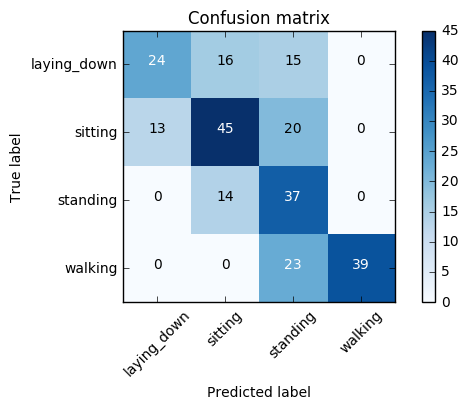

0.5894308943089431


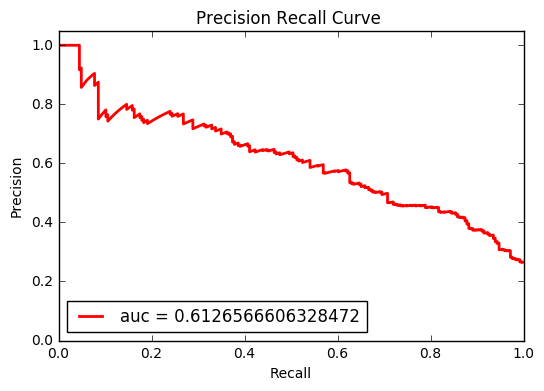

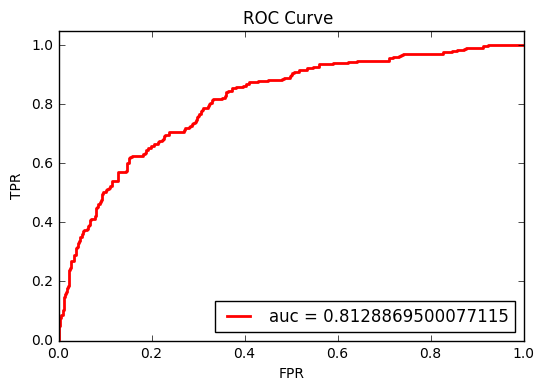

[0.64864865 0.6        0.38947368 1.        ]


In [12]:
preds = clf.predict(test_features)
#pred_labels = le_s.inverse_transform(preds)
#print(pred_labels[0:5])
plot_confusion_matrix(confusion_matrix(le_s.inverse_transform(test_labels),le_s.inverse_transform(preds)), classes = le_s.classes_)
print(accuracy_score(test_labels,preds))
score_knn = clf.predict_proba(test_features)
test_labels_bin = label_binarize(test_labels, classes = [0,1,2,3])
p_knn = dict()
r_knn = dict()
pr_auc_knn = dict()
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
p_knn["micro"],r_knn["micro"],_ = precision_recall_curve(test_labels_bin.ravel(),score_knn.ravel())
pr_auc_knn["micro"] = average_precision_score(test_labels_bin, score_knn,
                                                     average="micro")
fpr_knn["micro"],tpr_knn["micro"], _ = roc_curve(test_labels_bin.ravel(),score_knn.ravel())
roc_auc_knn["micro"] = auc(fpr_knn["micro"], tpr_knn["micro"])
plt.plot(r_knn["micro"], p_knn["micro"], color='red', lw=2,
            label='auc = {0}'.format(pr_auc_knn["micro"]))
plt.legend(loc="lower left")
plt.title('Precision Recall Curve ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()
plt.plot(fpr_knn["micro"], tpr_knn["micro"], color='red',
         lw=2, label='auc = {0}'.format(roc_auc_knn["micro"]))
plt.legend(loc="lower right")
plt.title('ROC Curve ')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

print(precision_score(test_labels, preds, average=None))
